In [1]:
import matplotlib.pyplot as plt
import numpy as np
import covalent as ct
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Load the dataset

In [2]:
@ct.electron
def load_dataset():
    return datasets.load_digits()

## Build the classifier

In [3]:
@ct.electron
def build_classifier(gamma: float):
    return svm.SVC(gamma = gamma)

### Test/Train split

In [4]:
@ct.electron
def split_data(features, targets, test_set_size):
    return train_test_split(features, targets, test_size=test_set_size, shuffle=False)

## Train classifier

In [5]:
@ct.electron
def train_classifier(clf, features, targets):
    return clf.fit(features, targets)

## Get predictions

In [6]:
@ct.electron
def get_predictions(clf, test_features):
    return clf.predict(test_features)

## Get classification report

In [7]:
@ct.electron
def get_classification_report(y_test, predicitions):
    return metrics.classification_report(y_test, predicitions)

### Workflow

In [8]:
@ct.lattice
def classify_digits(gamma: float):
    dataset = load_dataset()
    
    clf = build_classifier(gamma=gamma)
    
    x_train, x_test, y_train, y_test = split_data(features=dataset.data, targets=dataset.target, test_set_size=0.5)
    
    clf = train_classifier(clf=clf, features=x_train, targets=y_train)
    
    predictions = get_predictions(clf=clf, test_features=x_test)
    
    clf_report = get_classification_report(y_test=y_test, predicitions=predictions)
    
    return predictions, clf_report, x_test

### Dispatch workflow with gamma = 0.001

In [9]:
dispatch_id = ct.dispatch(classify_digits)(0.001)

In [10]:
result = ct.get_result(dispatch_id, wait=True)

In [11]:
predictions, clf_report, x_test = result.result

In [12]:
predictions

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 5, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

In [13]:
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



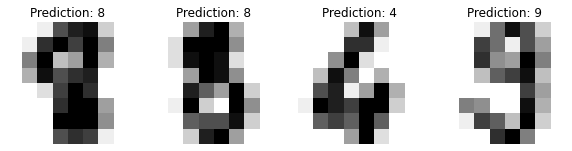

In [14]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

### Now that we have a based model trained and workflow setup, we can do some hyper-parameter tuning. In covalent we can mark lattices themselves as electrons to build larger workflows built on composition

In [15]:
@ct.electron
@ct.lattice
def classify_digits(gamma: float):
    dataset = load_dataset()
    
    clf = build_classifier(gamma=gamma)
    
    x_train, x_test, y_train, y_test = split_data(features=dataset.data, targets=dataset.target, test_set_size=0.5)
    
    clf = train_classifier(clf=clf, features=x_train, targets=y_train)
    
    predictions = get_predictions(clf=clf, test_features=x_test)
    
    clf_report = get_classification_report(y_test=y_test, predicitions=predictions)
    
    return predictions, clf_report, x_test

In [16]:
@ct.lattice
def find_best_gamma(gamma_values):
    results = {}
    for gamma in gamma_values:
        results[f"{gamma}"] = {}
        predictions, clf_report, _ = classify_digits(gamma)
        
        results[f"{gamma}"]["predictions"] = predictions
        results[f"{gamma}"]["report"] = clf_report
    return results

In [17]:
result = ct.dispatch_sync(find_best_gamma)([0.001, 0.002, 0.003, 0.01])

In [18]:
for gamma in [0.001, 0.002, 0.003, 0.01]:
    print(result.result[f"{gamma}"]["report"])

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.99      0.98      0.98        91
           2       0.99      0.98      0.98        86
           3       0.99 